In [494]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

In [556]:
df_train_15 = pd.read_csv('./bike_15_16_train.csv', index_col = 0)
df_train_11 = pd.read_csv('./train.csv', index_col = 0)

In [558]:
df_train_15.head()

,Counts,Sum_Duration,Hour,Day,Month,Year,atemperatue,humidity,temperature,windSpeed,Day_Name,weekday,Holiday
2015-01-01 00:00:00-05:00,54,48944.0,0,1,1,2015,-4.02,0.67,-4.02,0.04,Thursday,1,0
2015-01-01 01:00:00-05:00,114,79028.0,1,1,1,2015,-4.30,0.70,-4.30,0.43,Thursday,1,0
2015-01-01 02:00:00-05:00,100,67666.0,2,1,1,2015,-4.09,0.67,-4.09,0.57,Thursday,1,0
2015-01-01 03:00:00-05:00,16,31606.0,3,1,1,2015,-3.86,0.64,-3.86,0.55,Thursday,1,0
2015-01-01 04:00:00-05:00,8,5083.0,4,1,1,2015,-4.27,0.64,-4.27,0.47,Thursday,1,0


In [561]:
df_train_15.columns

Index(['Counts', 'Sum_Duration', 'Hour', 'Day', 'Month', 'Year', 'atemperatue',
       'humidity', 'temperature', 'windSpeed', 'Day_Name', 'weekday',
       'Holiday'],
      dtype='object')

In [560]:
#Rename old data set columns
df_train_15.columns = ['season', 'Holiday', 'weekday', 'Weather', 'temperature', 'atemperatue', 'humidity', 'windSpeed', 
                      'casual', 'registered','count']


ValueError: Length mismatch: Expected axis has 13 elements, new values have 11 elements

In [490]:
#Drop Useless Stuff
df_train_11 = df_train_11.drop(['casual', 'registered'], axis = 1)

KeyError: "['casual' 'registered'] not found in axis"

In [491]:
df_train_11 = df_train_11.drop(['Weather'], axis = 1)

In [492]:
df_train_11.columns

Index(['season', 'Holiday', 'weekday', 'temperature', 'atemperatue',
       'humidity', 'windSpeed', 'count'],
      dtype='object')

In [493]:
df_train_15.columns

Index(['Counts', 'Sum_Duration', 'Hour', 'Day', 'Month', 'Year', 'atemperatue',
       'humidity', 'temperature', 'windSpeed', 'Day_Name', 'weekday',
       'Holiday'],
      dtype='object')

In [497]:
#Encode Season in the Data_15
season_range = range(1,13)
seasons = ['1']*3 + ['2']*3 +['3']*3 + ['4']*3
season_new = dict(zip(season_range, seasons))
df_train_15['Seasons'] = df_train_15['Month'].map(season_new)

#Hour Binning
#hour_range = range(0,24)
#bins = ['Night']*6 + ['Morning']*5 + ['Day']*5 + ['Evening']*8
#hour_new = dict(zip(hour_range, bins))
#df_train['Hour_binned'] = df_train['Hour'].map(hour_new)

#Hour_Dict_Factorization_Low Level
#factor_hour = {'Night': 0, 'Morning':1, 'Day': 2, 'Evening': 3}
#df_train['Hour_Reconvert'] = df_train['Hour_binned'].map(factor_hour)



In [499]:
df_train_15.head()

,Counts,Sum_Duration,Hour,Day,Month,Year,atemperatue,humidity,temperature,windSpeed,Day_Name,weekday,Holiday,Seasons
2015-01-01 00:00:00-05:00,54,48944.0,0,1,1,2015,-4.02,0.67,-4.02,0.04,Thursday,1,0,1
2015-01-01 01:00:00-05:00,114,79028.0,1,1,1,2015,-4.30,0.70,-4.30,0.43,Thursday,1,0,1
2015-01-01 02:00:00-05:00,100,67666.0,2,1,1,2015,-4.09,0.67,-4.09,0.57,Thursday,1,0,1
2015-01-01 03:00:00-05:00,16,31606.0,3,1,1,2015,-3.86,0.64,-3.86,0.55,Thursday,1,0,1
2015-01-01 04:00:00-05:00,8,5083.0,4,1,1,2015,-4.27,0.64,-4.27,0.47,Thursday,1,0,1


In [500]:
#Drop Sum_Duration from 15 Data
df_train_15 = df_train_15.drop('Sum_Duration', axis = 1)
df_train_15.columns

Index(['Counts', 'Hour', 'Day', 'Month', 'Year', 'atemperatue', 'humidity',
       'temperature', 'windSpeed', 'Day_Name', 'weekday', 'Holiday',
       'Seasons'],
      dtype='object')

In [514]:
#Create needed variables to '11 Data
df_train_11['Day'] = pd.to_datetime(df_train_11.index).day
df_train_11['Hour'] = pd.to_datetime(df_train_11.index).hour
df_train_11['Month'] = pd.to_datetime(df_train_11.index).month
df_train_11['Year'] = pd.to_datetime(df_train_11.index).year



In [517]:
df_train_15.columns, df_train_11.columns

(Index(['Counts', 'Hour', 'Day', 'Month', 'Year', 'atemperatue', 'humidity',
        'temperature', 'windSpeed', 'Day_Name', 'weekday', 'Holiday',
        'Seasons'],
       dtype='object'),
 Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed', 'casual', 'registered', 'count', 'Day', 'Hour',
        'Month', 'Year'],
       dtype='object'))

In [519]:
df_train_11['Day_Name'] = pd.to_datetime(df_train_11.index).day_name()

In [521]:
df_train_11 = df_train_11.drop(['casual', 'registered'], axis = 1)

In [522]:
df_train_11.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'Day', 'Hour', 'Month', 'Year',
       'Day_Name'],
      dtype='object')

In [524]:
df_train_11 = df_train_11[['count','Hour','Day','Month','Year', 'atemp', 'humidity','temp','windspeed', 'Day_Name', 'workingday',
                           'holiday', 'season']]


In [527]:
#convert '15 humidity data to 100%'
df_train_15['humidity'] = df_train_15['humidity']*100

In [530]:
df_train_15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12675 entries, 2015-01-01 00:00:00-05:00 to 2016-10-02 23:00:00-04:00
Data columns (total 13 columns):
Counts         12675 non-null int64
Hour           12675 non-null int64
Day            12675 non-null int64
Month          12675 non-null int64
Year           12675 non-null int64
atemperatue    12675 non-null float64
humidity       12675 non-null float64
temperature    12675 non-null float64
windSpeed      12675 non-null float64
Day_Name       12675 non-null object
weekday        12675 non-null int64
Holiday        12675 non-null int64
Seasons        12675 non-null object
dtypes: float64(4), int64(7), object(2)
memory usage: 1.4+ MB


In [531]:
df_train_11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 13 columns):
count         10886 non-null int64
Hour          10886 non-null int64
Day           10886 non-null int64
Month         10886 non-null int64
Year          10886 non-null int64
atemp         10886 non-null float64
humidity      10886 non-null int64
temp          10886 non-null float64
windspeed     10886 non-null float64
Day_Name      10886 non-null object
workingday    10886 non-null int64
holiday       10886 non-null int64
season        10886 non-null int64
dtypes: float64(3), int64(9), object(1)
memory usage: 1.5+ MB


In [532]:
df_train_11['humidity'] = df_train_11['humidity'].astype('float64')

In [536]:
df_train_15['Seasons'] = df_train_15['Seasons'].astype('int64')

In [539]:
df_train_11.columns

Index(['count', 'Hour', 'Day', 'Month', 'Year', 'atemp', 'humidity', 'temp',
       'windspeed', 'Day_Name', 'workingday', 'holiday', 'season'],
      dtype='object')

In [542]:

df_train_15.columns =['count', 'Hour', 'Day', 'Month', 'Year', 'atemp', 'humidity', 'temp',
       'windspeed', 'Day_Name', 'workingday', 'holiday', 'season']

In [543]:
df_train_15.head()

,count,Hour,Day,Month,Year,atemp,humidity,temp,windspeed,Day_Name,workingday,holiday,season
2015-01-01 00:00:00-05:00,54,0,1,1,2015,-4.02,67.0,-4.02,0.04,Thursday,1,0,1
2015-01-01 01:00:00-05:00,114,1,1,1,2015,-4.30,70.0,-4.30,0.43,Thursday,1,0,1
2015-01-01 02:00:00-05:00,100,2,1,1,2015,-4.09,67.0,-4.09,0.57,Thursday,1,0,1
2015-01-01 03:00:00-05:00,16,3,1,1,2015,-3.86,64.0,-3.86,0.55,Thursday,1,0,1
2015-01-01 04:00:00-05:00,8,4,1,1,2015,-4.27,64.0,-4.27,0.47,Thursday,1,0,1


In [544]:
df_train_all = pd.concat([df_train_15, df_train_11], axis = 0)

In [545]:
df_train_all

,count,Hour,Day,Month,Year,atemp,humidity,temp,windspeed,Day_Name,workingday,holiday,season
2015-01-01 00:00:00-05:00,54,0,1,1,2015,-4.020,67.0,-4.02,0.0400,Thursday,1,0,1
2015-01-01 01:00:00-05:00,114,1,1,1,2015,-4.300,70.0,-4.30,0.4300,Thursday,1,0,1
2015-01-01 02:00:00-05:00,100,2,1,1,2015,-4.090,67.0,-4.09,0.5700,Thursday,1,0,1
2015-01-01 03:00:00-05:00,16,3,1,1,2015,-3.860,64.0,-3.86,0.5500,Thursday,1,0,1
2015-01-01 04:00:00-05:00,8,4,1,1,2015,-4.270,64.0,-4.27,0.4700,Thursday,1,0,1
2015-01-01 05:00:00-05:00,6,5,1,1,2015,-3.760,62.0,-3.76,0.3000,Thursday,1,0,1
2015-01-01 06:00:00-05:00,7,6,1,1,2015,-3.850,62.0,-3.85,0.2500,Thursday,1,0,1
2015-01-01 07:00:00-05:00,11,7,1,1,2015,-4.700,66.0,-4.70,0.0900,Thursday,1,0,1
2015-01-01 08:00:00-05:00,32,8,1,1,2015,-4.500,63.0,-4.50,0.1300,Thursday,1,0,1
2015-01-01 09:00:00-05:00,46,9,1,1,2015,-0.990,59.0,-0.99,3.8900,Thursday,1,0,1


In [546]:
df_train_all.columns

Index(['count', 'Hour', 'Day', 'Month', 'Year', 'atemp', 'humidity', 'temp',
       'windspeed', 'Day_Name', 'workingday', 'holiday', 'season'],
      dtype='object')

In [547]:
#Separate Categorical and Numerical Columns

num_list = ['count', 'atemp', 'humidity', 'temp', 'windspeed']
num_nows = ['count', 'atemp', 'humidity', 'temp']
cat_list = df_train_all.columns.drop(num_list).tolist()

In [548]:
#Save training data
df_train_all.to_csv('bike_15_16_12_11_train.csv')

In [562]:
df_train_all.columns

Index(['count', 'Hour', 'Day', 'Month', 'Year', 'atemp', 'humidity', 'temp',
       'windspeed', 'Day_Name', 'workingday', 'holiday', 'season'],
      dtype='object')

In [565]:
#Read the test data
df_test_15 = pd.read_csv('./bike_15_16_test.csv', index_col = 0)
df_test_11 = pd.read_csv('./test.csv', index_col = 0)

In [564]:
df_test_15.columns

Index(['Counts', 'Sum_Duration', 'Hour', 'Day', 'Month', 'Year', 'atemperatue',
       'humidity', 'temperature', 'windSpeed', 'Day_Name', 'weekday',
       'Holiday'],
      dtype='object')

In [566]:
df_test_11.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed'],
      dtype='object')

In [567]:
#CANNOT CONCAT THESE TWO SINCE 11 DATA HAS NO COUNTS

In [569]:
df_test_15 = df_test_15.drop(['Sum_Duration'], axis = 1)

In [570]:
df_test_15.columns = ['count', 'Hour', 'Day', 'Month', 'Year', 'atemp', 'humidity', 'temp', 'windspeed', 'Day_Name', 'workingday',
                     'holiday']

In [571]:
df_test_15.columns

Index(['count', 'Hour', 'Day', 'Month', 'Year', 'atemp', 'humidity', 'temp',
       'windspeed', 'Day_Name', 'workingday', 'holiday'],
      dtype='object')

In [574]:
#Make a season for Test_15
season_range = range(1,13)
seasons = ['1']*3 + ['2']*3 +['3']*3 + ['4']*3
season_new = dict(zip(season_range, seasons))
df_test_15['season'] = df_test_15['Month'].map(season_new)

In [575]:
df_test_15.columns

Index(['count', 'Hour', 'Day', 'Month', 'Year', 'atemp', 'humidity', 'temp',
       'windspeed', 'Day_Name', 'workingday', 'holiday', 'Seasons', 'season'],
      dtype='object')

In [576]:
df_test_15 = df_test_15.drop('Seasons', axis = 1)

In [577]:
df_test_15.columns

Index(['count', 'Hour', 'Day', 'Month', 'Year', 'atemp', 'humidity', 'temp',
       'windspeed', 'Day_Name', 'workingday', 'holiday', 'season'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 23561 entries, 2015-01-01 00:00:00-05:00 to 2012-12-19 23:00:00
Data columns (total 13 columns):
count         23561 non-null int64
Hour          23561 non-null int64
Day           23561 non-null int64
Month         23561 non-null int64
Year          23561 non-null int64
atemp         23561 non-null float64
humidity      23561 non-null float64
temp          23561 non-null float64
windspeed     23561 non-null float64
Day_Name      23561 non-null object
workingday    23561 non-null int64
holiday       23561 non-null int64
season        23561 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 2.5+ MB


In [579]:
df_test_15 = df_test_15[['count', 'Hour', 'Day', 'Month', 'Year', 'atemp', 'humidity', 'temp',
       'windspeed', 'Day_Name', 'workingday', 'holiday', 'season']]

In [580]:
df_test_15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2640 entries, 2015-01-27 00:00:00-05:00 to 2016-10-07 23:00:00-04:00
Data columns (total 13 columns):
count         2640 non-null int64
Hour          2640 non-null int64
Day           2640 non-null int64
Month         2640 non-null int64
Year          2640 non-null int64
atemp         2640 non-null float64
humidity      2640 non-null float64
temp          2640 non-null float64
windspeed     2640 non-null float64
Day_Name      2640 non-null object
workingday    2640 non-null int64
holiday       2640 non-null int64
season        2640 non-null object
dtypes: float64(4), int64(7), object(2)
memory usage: 368.8+ KB


In [581]:
df_train_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23561 entries, 2015-01-01 00:00:00-05:00 to 2012-12-19 23:00:00
Data columns (total 13 columns):
count         23561 non-null int64
Hour          23561 non-null int64
Day           23561 non-null int64
Month         23561 non-null int64
Year          23561 non-null int64
atemp         23561 non-null float64
humidity      23561 non-null float64
temp          23561 non-null float64
windspeed     23561 non-null float64
Day_Name      23561 non-null object
workingday    23561 non-null int64
holiday       23561 non-null int64
season        23561 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 2.5+ MB


In [583]:
#Convert Season into int64 for df_test_15
df_test_15['season'] = df_test_15['season'].astype('int64')

In [584]:
df_test_15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2640 entries, 2015-01-27 00:00:00-05:00 to 2016-10-07 23:00:00-04:00
Data columns (total 13 columns):
count         2640 non-null int64
Hour          2640 non-null int64
Day           2640 non-null int64
Month         2640 non-null int64
Year          2640 non-null int64
atemp         2640 non-null float64
humidity      2640 non-null float64
temp          2640 non-null float64
windspeed     2640 non-null float64
Day_Name      2640 non-null object
workingday    2640 non-null int64
holiday       2640 non-null int64
season        2640 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 368.8+ KB


In [586]:
df_train_all.head()

,count,Hour,Day,Month,Year,atemp,humidity,temp,windspeed,Day_Name,workingday,holiday,season
2015-01-01 00:00:00-05:00,54,0,1,1,2015,-4.02,67.0,-4.02,0.04,Thursday,1,0,1
2015-01-01 01:00:00-05:00,114,1,1,1,2015,-4.30,70.0,-4.30,0.43,Thursday,1,0,1
2015-01-01 02:00:00-05:00,100,2,1,1,2015,-4.09,67.0,-4.09,0.57,Thursday,1,0,1
2015-01-01 03:00:00-05:00,16,3,1,1,2015,-3.86,64.0,-3.86,0.55,Thursday,1,0,1
2015-01-01 04:00:00-05:00,8,4,1,1,2015,-4.27,64.0,-4.27,0.47,Thursday,1,0,1


In [587]:
df_test_15.head()

,count,Hour,Day,Month,Year,atemp,humidity,temp,windspeed,Day_Name,workingday,holiday,season
2015-01-27 00:00:00-05:00,11,0,27,1,2015,-7.65,0.84,-2.61,15.16,Tuesday,1,0,1
2015-01-27 01:00:00-05:00,5,1,27,1,2015,-6.81,0.84,-2.46,12.20,Tuesday,1,0,1
2015-01-27 02:00:00-05:00,1,2,27,1,2015,-6.84,0.84,-2.43,12.48,Tuesday,1,0,1
2015-01-27 03:00:00-05:00,1,3,27,1,2015,-6.99,0.82,-1.60,18.38,Tuesday,1,0,1
2015-01-27 04:00:00-05:00,2,4,27,1,2015,-6.39,0.79,-1.44,16.14,Tuesday,1,0,1


In [588]:
df_test_15['humidity'] = df_test_15['humidity']*100

In [589]:
df_test_15.head()

,count,Hour,Day,Month,Year,atemp,humidity,temp,windspeed,Day_Name,workingday,holiday,season
2015-01-27 00:00:00-05:00,11,0,27,1,2015,-7.65,84.0,-2.61,15.16,Tuesday,1,0,1
2015-01-27 01:00:00-05:00,5,1,27,1,2015,-6.81,84.0,-2.46,12.20,Tuesday,1,0,1
2015-01-27 02:00:00-05:00,1,2,27,1,2015,-6.84,84.0,-2.43,12.48,Tuesday,1,0,1
2015-01-27 03:00:00-05:00,1,3,27,1,2015,-6.99,82.0,-1.60,18.38,Tuesday,1,0,1
2015-01-27 04:00:00-05:00,2,4,27,1,2015,-6.39,79.0,-1.44,16.14,Tuesday,1,0,1


(array([9.238e+03, 7.581e+03, 3.849e+03, 1.739e+03, 7.260e+02, 2.810e+02,
        1.070e+02, 3.100e+01, 6.000e+00, 3.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <a list of 10 Patch objects>)

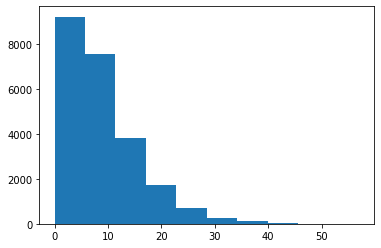

In [590]:
plt.hist(df_train_all['windspeed'])

(array([740., 841., 435., 257., 171., 114.,  52.,  19.,  10.,   1.]),
 array([ 0.   ,  2.652,  5.304,  7.956, 10.608, 13.26 , 15.912, 18.564,
        21.216, 23.868, 26.52 ]),
 <a list of 10 Patch objects>)

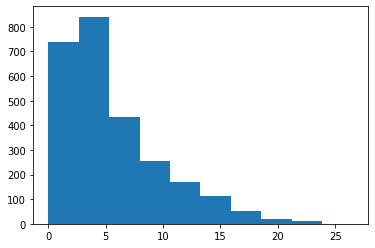

In [591]:
plt.hist(df_test_15['windspeed'])

In [592]:
df_test_15.to_csv('bike_15_16_test_new.csv')